<h1 align=center>Aprendizado por Reforço para Tomada de Decisão em Ambientes Complexos</h1>

<p align=center><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Aprendizagem-por-Refor%C3%A7o.jpg?resize=350%2C350&ssl=1></p>

Anteriomente, focamos no aprendizado de máquina supervisionado e não supervisionado. Também aprendemos como aproveitar as redes neurais artificiais e o aprendizado profundo para lidar com os problemas encontrados com esses tipos de aprendizado de máquina. Como você deve se lembrar, o aprendizado supervisionado se concentra em prever um rótulo de categoria ou valor contínuo de um determinado vetor de recursos de entrada. O aprendizado não supervisionado se concentra na extração de padrões de dados, tornando-o útil para compactação de dados, clustering ou aproximando a distribuição do conjunto de treinamento para gerar novos dados.

Agora, voltamos nossa atenção para uma categoria separada de aprendizado de máquina, aprendizado por reforço (RL), que é diferente das categorias anteriores, pois se concentra em aprender uma série de ações para otimizar uma recompensa geral - por exemplo, vencer em um jogo de xadrez. Em resumo, abordaremos os seguintes tópicos:
* Aprender os conceitos básicos de RL, familiarizar-se com as interações agente/ambiente e entender como funciona o processo de recompensa, a fim de ajudar a tomar decisões em ambientes complexos
* Apresentando diferentes categorias de problemas de RL, tarefas de aprendizado baseadas em modelo e sem modelo, Monte Carlo e algoritmos de aprendizado de diferença temporal
* Implementação de um algoritmo de Q-learning em formato tabular
* Compreender a aproximação de função para resolver problemas de RL e combinar RL com aprendizado profundo através da implementação de um algoritmo Q-learning profundo

RL é uma área de pesquisa complexa e vasta, e este módulo se concentrará nos fundamentos. Como este módulo serve como uma introdução, e para manter nossa atenção nos métodos e algoritmos importantes, trabalharemos principalmente com exemplos básicos que ilustram os principais conceitos. No entanto, no final deste módulo, examinaremos um exemplo mais desafiador e utilizaremos arquiteturas de aprendizado profundo para uma abordagem de RL específica, conhecida como Q-learning profundo.

### Introdução – aprendendo com a experiência
Nesta seção, apresentaremos primeiro o conceito de RL como um ramo do aprendizado de máquina e veremos suas principais diferenças em comparação com outras tarefas de aprendizado de máquina. Depois disso, abordaremos os componentes fundamentais de um sistema RL. Em seguida, veremos a formulação matemática RL baseada no processo de decisão de Markov.

### Entendendo o aprendizado por reforço
Até este ponto, este material se concentrou principalmente no aprendizado *supervisionado* e *não supervisionado*. Lembre-se de que no aprendizado *supervisionado*, contamos com exemplos de treinamento rotulados, fornecidos por um supervisor ou um especialista humano, e o objetivo é treinar um modelo que possa generalizar bem para exemplos de teste não rotulados e não vistos. Isso significa que o modelo de aprendizado supervisionado deve aprender a atribuir os mesmos rótulos ou valores a um determinado exemplo de entrada que o especialista humano supervisor. Por outro lado, no aprendizado não supervisionado, o objetivo é aprender ou capturar a estrutura subjacente de um conjunto de dados, como em métodos de agrupamento e redução de dimensionalidade; ou aprender a gerar novos exemplos de treinamento sintéticos com uma distribuição subjacente semelhante. O RL é substancialmente diferente do aprendizado supervisionado e não supervisionado e, portanto, o RL é frequentemente considerado a "terceira categoria de aprendizado de máquina".

O elemento chave que distingue o RL de outras subtarefas de aprendizado de máquina, como aprendizado supervisionado e não supervisionado, é que o RL está centrado no conceito de **aprendizado por interação**. Isso significa que em RL, o modelo aprende com as interações com um ambiente para maximizar uma **função de recompensa.**

Embora a maximização de uma função de recompensa esteja relacionada ao conceito de minimizar a função de custo no aprendizado supervisionado, os rótulos *corretos* para aprender uma série de ações não são conhecidos ou definidos antecipadamente em RL - em vez disso, eles precisam ser aprendidos por meio de interações com o ambiente, a fim de alcançar um determinado resultado desejado - como vencer em um jogo. Com o RL, o modelo (também chamado de **agente**) interage com seu ambiente e, ao fazê-lo, gera uma sequência de interações que, em conjunto, são chamadas de **episódio**. Por meio dessas interações, o agente coleta uma série de recompensas determinadas pelo ambiente. Essas recompensas podem ser positivas ou negativas e, às vezes, não são divulgadas ao agente até o final de um episódio.

Por exemplo, imagine que queremos ensinar um computador a jogar xadrez e vencer jogadores humanos. Os rótulos (recompensas) para cada movimento individual de xadrez feito pelo computador não são conhecidos até o final do jogo, porque durante o jogo em si, não sabemos se um movimento específico resultará em ganhar ou perder esse jogo. Apenas no final do jogo o feedback é determinado. Esse feedback provavelmente seria uma recompensa positiva dada se o computador ganhasse o jogo, porque o agente havia alcançado o resultado geral desejado; e vice-versa, uma recompensa negativa provavelmente seria dada se o computador tivesse perdido o jogo. 

Além disso, considerando o exemplo de jogar xadrez, a entrada é a configuração atual, por exemplo, a disposição das peças individuais de xadrez no tabuleiro. Dado o grande número de entradas possíveis (os estados do sistema), é impossível rotular cada configuração ou estado como positivo ou negativo. Portanto, para definir um processo de aprendizado, fornecemos recompensas (ou penalidades) ao final de cada jogo, quando sabemos se atingimos o resultado desejado – se vencemos ou não o jogo.

Esta é a essência do RL. Em RL, não podemos ou não ensinamos a um agente, computador ou robô, como fazer as coisas; podemos apenas especificar o que queremos que o agente alcance. Então, com base no resultado de um teste específico, podemos determinar recompensas dependendo do sucesso ou fracasso do agente. Isso torna a RL muito atraente para a tomada de decisões em ambientes complexos – especialmente quando a tarefa de resolução de problemas requer uma série de etapas, que são desconhecidas, difíceis de explicar ou definir. Além de aplicações em jogos e robótica, exemplos de RL também podem ser encontrados na natureza. Por exemplo, treinar um cão envolve RL – nós entregamos recompensas (guloseimas) ao cão quando ele realiza certas ações desejáveis. Ou considere um cão médico treinado para avisar seu parceiro de uma convulsão que se aproxima. Neste caso, não sabemos o mecanismo exato pelo qual o cão é capaz de detectar uma convulsão que se aproxima, e certamente não poderíamos definir uma série de etapas para aprender a detecção de convulsões, mesmo que tivéssemos conhecimento preciso disso. mecanismo. No entanto, podemos recompensar o cão com um petisco se ele detectar com sucesso uma convulsão para reforçar esse comportamento!

Embora a RL forneça uma estrutura poderosa para aprender uma série arbitrária de ações, para atingir um determinado objetivo, lembre-se de que a RL ainda é uma área de pesquisa relativamente jovem e ativa com muitos desafios não resolvidos. Um aspecto que torna o treinamento de modelos de RL particularmente desafiador é que as entradas do modelo consequentes dependem de ações realizadas anteriormente. Isso pode levar a todos os tipos de problemas e geralmente resulta em comportamento de aprendizagem instável. Além disso, essa dependência de sequência em RL cria o chamado **efeito retardado**, o que significa que a ação realizada em um passo de tempo `t` pode resultar em uma recompensa futura aparecendo em um número arbitrário de passos depois.

### Definindo a interface agente-ambiente de um sistema de aprendizado por reforço
Em todos os exemplos de RL, podemos encontrar duas entidades distintas: um agente e um ambiente. Formalmente, um **agente** é definido como uma entidade que aprende a tomar decisões e interage com o ambiente ao seu redor por meio de uma ação. Em troca, como consequência de uma ação, o agente recebe observações e um sinal de recompensa conforme governado pelo ambiente. O **ambiente** é qualquer coisa que esteja fora do agente. O ambiente se comunica com o agente e determina o sinal de recompensa para a ação do agente, bem como suas observações.

O **sinal de recompensa** é o feedback que o agente recebe da interação com o ambiente, que geralmente é fornecido na forma de um valor escalar e pode ser positivo ou negativo. O objetivo da recompensa é dizer ao agente o quão bem ele se saiu. A frequência com que o agente recebe a recompensa depende da tarefa ou problema em questão. Por exemplo, no jogo de xadrez, a recompensa seria determinada após uma partida completa com base no resultado de todas as jogadas: uma vitória ou uma derrota. Por outro lado, poderíamos definir um labirinto tal que a recompensa seja determinada após cada passo de tempo. Nesse labirinto, o agente tenta maximizar suas recompensas acumuladas ao longo de sua vida – onde a vida descreve a duração de um episódio.

O diagrama a seguir ilustra as interações e a comunicação entre o agente e o ambiente:

<>:2: DeprecationWarning: invalid escape sequence \R


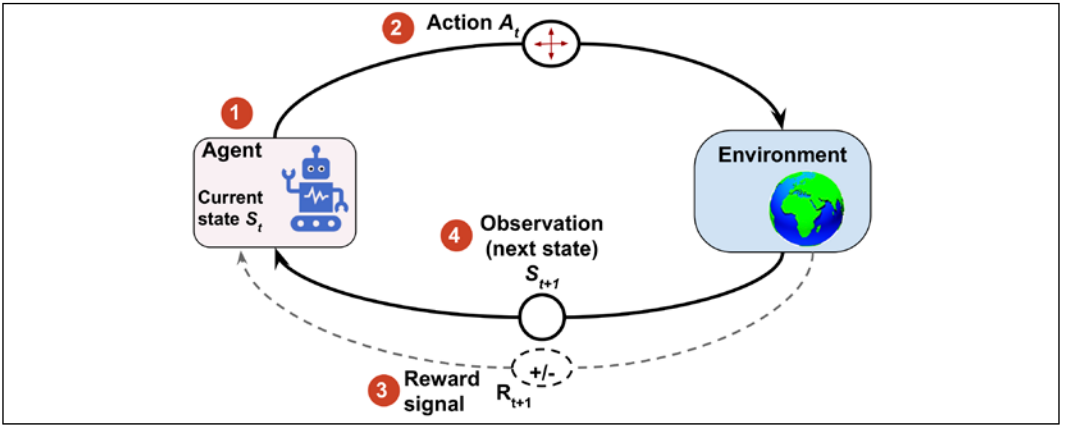

In [15]:
from IPython.display import Image
Image('imagens\RL_Diagrama.PNG')

O estado do agente, conforme ilustrado na figura anterior, é o conjunto de todas as suas variáveis ​​(1). Por exemplo, no caso de um drone robô, essas variáveis ​​podem incluir a posição atual do drone (longitude, latitude e altitude), a vida útil restante da bateria do drone, a velocidade de cada ventoinha e assim por diante. A cada passo de tempo, o agente interage com o ambiente através de um conjunto de ações disponíveis $\small A_t$ (2). Com base na ação realizada pelo agente denotada por $\small A_t$, enquanto estiver no estado $\small S_t$, o agente receberá um sinal de recompensa $\small R_{t+ 1}$(3), e seu estado se tornará $\small S_{t+1}$ (4).

Durante o processo de aprendizagem, o agente deve tentar diferentes ações (**exploration**), para que possa aprender progressivamente quais ações prefere e realizar com mais frequência (**exploitation**) a fim de maximizar a recompensa total e cumulativa. Para entender esse conceito, vamos considerar um exemplo muito simples em que um recém-formado em ciência da computação com foco em engenharia de software está se perguntando se deve começar a trabalhar em uma empresa (exploitation) ou fazer um mestrado ou doutorado para aprender mais sobre ciência de dados e aprendizado de máquina (exploration). Em geral, a exploitation resultará na escolha de ações com uma recompensa maior no curto prazo, enquanto a exploration pode resultar em recompensas totais maiores no longo prazo. O *tradeoff* entre *exploitation* e *exploration* tem sido estudado extensivamente e, no entanto, não há uma resposta universal para esse dilema de tomada de decisão.

### Os fundamentos teóricos da RL 

Antes de pularmos para alguns exemplos práticos e começarmos a treinar um modelo de RL, o que faremos mais adiante neste componente, vamos primeiro entender alguns dos fundamentos teóricos da RL. As seções a seguir começarão examinando primeiro a formulação matemática dos **processos de decisão de Markov**, tarefas episódicas versus tarefas contínuas, algumas terminologias-chave de RL e programação dinâmica usando a **equação de Bellman**. Vamos começar com os processos de decisão de Markov.

### Processos de decisão de Markov
Em geral, os tipos de problemas com os quais a RL lida são normalmente formulados como **processos de decisão de Markov (MDPs)**. A abordagem padrão para resolver problemas de MDP é usando programação dinâmica, mas a RL oferece algumas vantagens importantes sobre a programação dinâmica.

> ##### Programaçao dinâmica
> A programação dinâmica refere-se a um conjunto de algoritmos de computador e métodos de programação que foi desenvolvido por Richard Bellman na década de 1950. Em certo sentido, a programação dinâmica é sobre a resolução de problemas recursivos – resolvendo problemas relativamente complicados dividindo-os em subproblemas menores.
>
> A principal diferença entre recursão e programação dinâmica é que a programação dinâmica armazena os resultados dos subproblemas (geralmente como um dicionário ou outra forma de tabela de consulta) para que possam ser acessados ​​em tempo constante (em vez de recalculá-los) se forem encontrados novamente em futuro.
>
> Exemplos de alguns problemas famosos em ciência da computação que são resolvidos por programação dinâmica incluem alinhamento de sequência e cálculo do caminho mais curto do ponto A ao ponto B.

A programação dinâmica não é uma abordagem viável, no entanto, quando o tamanho dos estados (ou seja, o número de configurações possíveis) é relativamente grande. Nesses casos, a RL é considerada uma abordagem alternativa muito mais eficiente e prática para resolver MDPs.

### A formulação matemática dos processos de decisão de Markov
Os tipos de problemas que requerem o aprendizado de um processo de tomada de decisão interativo e sequencial, onde a decisão no passo de tempo **t** afeta as situações subsequentes, são formalizados matematicamente como processos de decisão de Markov (MDPs).

No caso das interações agente/ambiente em RL, se denotarmos o estado inicial do agente como $\small S_0$, as interações entre o agente e o ambiente resultam em uma sequência da seguinte forma:
$$
\small \{S_0,A_0,R_1\}, \{S_1,A_1,R_2\}, \{S_2,A_2,R_31\}, \cdots
$$

Observe que as chaves servem apenas como auxílio visual. Aqui, $\small S_t$ e $\small A_t$ representam o estado e a ação realizada no passo de tempo *t*. $\small R_{t+1}$ denota a recompensa recebida do ambiente após realizar a ação $\small A_t$. Observe que $\small S_t$, $\small R_{t+1}$ e $\small A_t$ são variáveis ​​aleatórias dependentes do tempo que tiram valores de conjuntos finitos predefinidos denotados por $\small s \in \hat{S}$, $\small r \in \hat{R}$ e $\small a \in \hat{A}$, respectivamente. Em um MDP, essas variáveis ​​aleatórias dependentes do tempo, $\small S_t$ e $\small R_{t+1}$, têm distribuições de probabilidade que dependem apenas de seus valores no passo de tempo anterior, **t – 1**. A distribuição de probabilidade para $\small S_{t+1} = s^\prime$ e $\small R_{t+1} = r$ pode ser escrito como uma probabilidade condicional sobre o estado anterior ($\small S_t$) e a ação tomada ($\small A_t$) da seguinte forma:
$$
\small p(s^ \prime , r|s, a)  \overset{def}{=} P(S_{t+1} = s^\prime, R_{t+1} = r|S_t = s,A_t =a)
$$

Essa distribuição de probabilidade define completamente a **dinâmica do ambiente** (ou modelo do ambiente), pois, com base nessa distribuição, todas as probabilidades de transição do ambiente podem ser calculadas. Portanto, a dinâmica do ambiente é um critério central para categorizar diferentes métodos de RL. Os tipos de métodos RL que requerem um modelo do ambiente ou tentam aprender um modelo do ambiente (ou seja, a dinâmica do ambiente) são chamados de métodos **baseados em modelo**, em oposição aos **métodos livres de modelo**.

> ##### RL livre de modelo e baseado em modelo
> Quando a probabilidade $\small p(s^ \prime , r|s, a)$ é conhecida, então a tarefa de aprendizagem pode ser resolvida com programação dinâmica. Mas quando a dinâmica do ambiente não é conhecida, como é o caso de muitos problemas do mundo real, você precisaria adquirir um grande número de amostras por meio da interação com o ambiente para compensar a dinâmica do ambiente desconhecido.
>
> Duas abordagens principais para lidar com este problema são os métodos de Monte Carlo (MC) e de diferença temporal (TD) sem modelo. O gráfico a seguir mostra as duas categorias principais e as ramificações de cada método:

<>:1: DeprecationWarning: invalid escape sequence \p


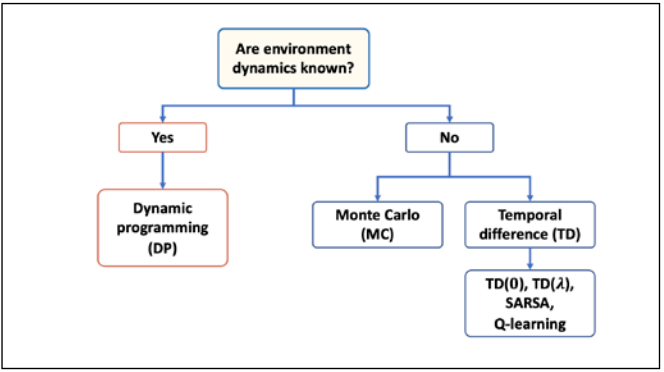

In [16]:
Image('imagens\programacao_dinamica.PNG')

A dinâmica do ambiente pode ser considerada determinística se ações particulares para determinados estados são sempre ou nunca tomadas, ou seja, $\small p(s^ \prime , r|s, a) \in \{0,1\}$. Caso contrário, no caso mais geral, o ambiente teria comportamento estocástico.

Para entender esse comportamento estocástico, vamos considerar a probabilidade de observar o estado futuro $\small S_{t+1} =s^\prime$ condicionado ao estado atual $\small S_t = s$ e a ação executada $\small A_t = a$. Isto é denotado por $\small p(s^ \prime |s, a)  \overset{def}{=} P(S_{t+1} = s^\prime|S_t = s, A_t =a)$.

Ele pode ser calculado como uma probabilidade marginal tomando a soma sobre todas as recompensas possíveis:
$$
\small p(s^ \prime |s, a)  \overset{def}{=} \sum_{r \in \hat{R}}p(s^ \prime, r|s, a)
$$

Essa probabilidade é chamada de **probabilidade de transição de estado**. Com base na probabilidade de transição de estado, se a dinâmica do ambiente for determinística, isso significa que quando o agente age $\small A_t = a$ no estado $\small S_t = s$, a transição para o próximo estado, $\small S_{t+1} = s^\prime$, será 100 por cento certo, ou seja, $\small p(s^ \prime |s, a)$ = 1.

### Visualização de um processo de Markov
Um processo de Markov pode ser representado como um grafo cíclico direcionado no qual os nós do grafo representam os diferentes estados do ambiente. As arestas do grafo (ou seja, as conexões entre os nós) representam as probabilidades de transição entre os estados.

Por exemplo, vamos considerar um aluno decidindo entre três situações diferentes: (A) estudar para uma prova em casa, (B) jogar videogame em casa ou (C) estudar na biblioteca. Além disso, há um estado terminal (T) para ir dormir. As decisões são tomadas a cada hora e, após tomar uma decisão, o aluno permanecerá em uma situação escolhida para aquela hora específica. Então, suponha que, ao ficar em casa (estado A), há uma probabilidade de 50% de que o aluno mude a atividade para jogar videogame. Por outro lado, quando o aluno está no estado B (jogando videogame), há uma chance relativamente alta (80%) de que o aluno continue jogando o videogame nas horas subsequentes.

A dinâmica do comportamento do aluno é mostrada como um processo de Markov na figura a seguir, que inclui um gráfico cíclico e uma tabela de transição:

<>:1: DeprecationWarning: invalid escape sequence \d


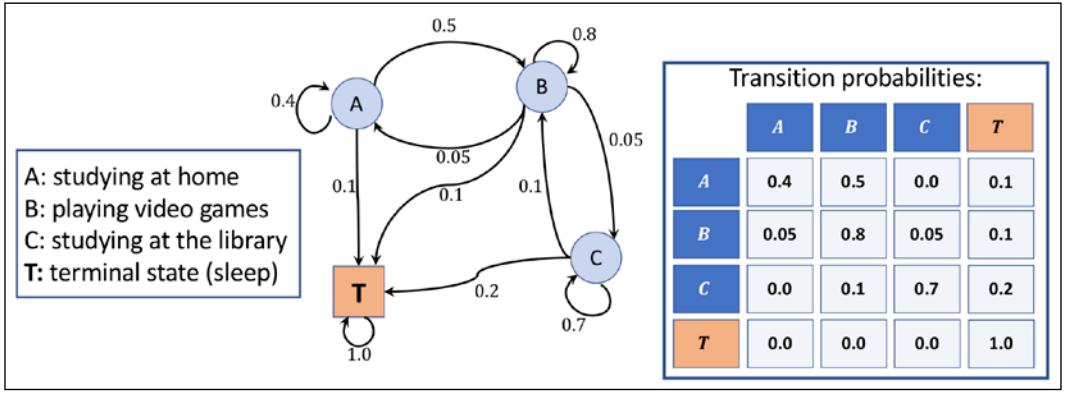

In [17]:
Image("imagens\decisoes_aluno.PNG")

Os valores nas bordas do gráfico representam as probabilidades de transição do comportamento do aluno, e seus valores também são mostrados na tabela à direita. Ao considerar as linhas na tabela, observe que as probabilidades de transição saindo de cada estado (nó) sempre somam 1.

### Tarefas episódicas versus tarefas contínuas
À medida que o agente interage com o ambiente, a sequência de observações ou estados forma uma trajetória. Existem dois tipos de trajetórias. Se a trajetória de um agente puder ser dividida em subpartes de modo que cada uma comece no tempo `t = 0` e termine em um estado terminal $\small S_T$ (em `t = T`), a tarefa é chamada de **tarefa episódica**. Por outro lado, se a trajetória é infinitamente contínua sem um estado terminal, a tarefa é chamada de **tarefa contínua**.

A tarefa relacionada a um agente de aprendizagem para o jogo de xadrez é uma tarefa episódica, enquanto um robô de limpeza que mantém uma casa arrumada normalmente executa uma tarefa contínua. Neste módulo, consideramos apenas tarefas episódicas. Em tarefas episódicas, um **episódio** é uma sequência ou trajetória que um agente leva de um estado inicial, $\small S_0$, para um estado terminal, $\small S_T$:

$$
\small S_0,A_0,R_1,S_1,A_1,R_2,\cdots, S_t,A_t,R_{t+1},\cdots, S_{T-1},A_{T-1},R_T,S_T
$$

Para o processo de Markov mostrado na figura anterior, que retrata a tarefa de um aluno estudando para um exame, podemos encontrar episódios como os três exemplos a seguir:
$$
\small \text{Epis$\acute{o}$deo 1: BBCCCCBAT $\rightarrow$ passa (recompensa final = +1)}\\
\small \text{Epis$\acute{o}$deo 2: ABBBBBBBBBT $\rightarrow$ falha (recompensa final = -1)}\\
\small \text{Epis$\acute{o}$deo 3: BCCCCCT $\rightarrow$ passa (recompensa final = +1)}\\
$$

### Terminologia RL: retorno, política e função de valor
Em seguida, vamos definir algumas terminologias adicionais específicas de RL que precisaremos para o restante deste módulo.

### O retorno
O chamado retorno no tempo **t** é a recompensa acumulada obtida de toda a duração de um episódio. Lembre-se que $\small R_{t+1} = r$ é a **recompensa imediata** obtida após realizar uma ação, $\small A_t$, no tempo **t**; as recompensas *subsequentes* são $\small R_{t+2}$, $\small R_{t+3}$ e assim por diante.

O retorno no tempo t pode então ser calculado a partir da recompensa imediata, bem como das subsequentes, como segue:
$$
\small G_t  \overset{def}{=} R_{t+1} + \gamma R_{t+2}+  \gamma^2R_{t+3} + \cdots = \sum_{k=0}\gamma^kR_{t+k+1}
$$

Aqui, $\small \gamma$ é o fator de desconto no intervalo[0, 1]. O parâmetro $\small \gamma$ indica quanto as recompensas futuras *"valem"* no momento atual (tempo *t*). Observe que, definindo $\small \gamma = 0$, implicaríamos que não nos importamos com recompensas futuras. Nesse caso, o retorno será igual à recompensa imediata, ignorando as recompensas subsequentes após *t + 1*, e o agente terá uma visão curta. Por outro lado, se $\small \gamma = 1$, o retorno será a soma não ponderada de todas as recompensas subsequentes.

Além disso, observe que a equação para o retorno pode ser expressa de maneira mais simples usando uma recursão da seguinte forma:
$$
\small G_t  = R_{t+1} + \gamma G_{t+1}= r + \gamma G_{t+1}  
$$

Isso significa que o retorno no tempo *t* é igual à recompensa imediata *r* mais o retorno futuro descontado no tempo *t + 1*. Esta é uma propriedade muito importante, que facilita os cálculos do retorno.


> ##### Intuição por trás do fator de desconto
> Para entender o fator de desconto, considere a figura a seguir que mostra o valor de ganhar uma nota de $\$100 hoje comparado a ganhar daqui a um ano. Sob certas situações econômicas, como a inflação, ganhar essa nota de $\$100 agora pode valer mais do que ganhá-la no futuro:

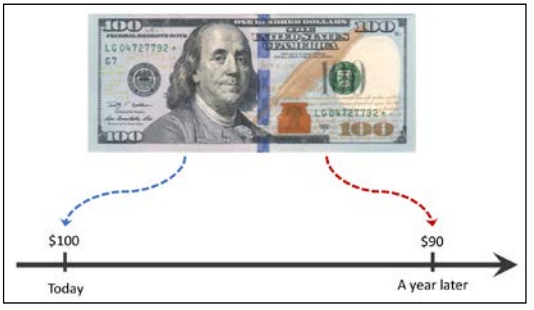

In [18]:
Image("imagens\discount_factor.PNG")

> Portanto, dizemos que se esta nota vale $\$100 agora, então valeria $\$90 em um ano com um fator de desconto $\small \gamma = 0.9$.

Vamos calcular o retorno em diferentes intervalos de tempo para os episódios em nosso exemplo de aluno anterior. Suponha que $\small \gamma = 0.9$, e que a única recompensa dada é baseada no resultado do exame (+1 para passar no exame e -1 para reprovar). As recompensas para passos de tempo intermediários são 0.

Episódeo 1: BBCCCCBAT  $\rightarrow$ passa (recompensa final = +1):

* t = 0  $\quad$   :  $\small G_0 = R_1 + \gamma R_2 + \gamma^2R_3+\cdots\gamma^6R_7$

$\small \quad \rightarrow G_0 = 0 + 0\times \gamma + \cdots + 1 + \gamma^6 = 0.9^6 \approx 0,531$

* t = 1 $\quad$   : $\small G_1 = 1\times \gamma ^5 = 0,590$

* t = 2 $\quad$: $\small G_2 = 1 \times \gamma^4 = 0.656$
* $\cdots$

* t = 6 $\quad$: $\small G_6 = 1 \times \gamma = 0.9 $

* t = 7 $\quad$: $\small G_7 = 1=1$

Episódeo 2: ABBBBBBBBBT  $\rightarrow$ falha (recompensa final = -1):

* t = 0 $\quad$: $\small G_0 = -1 \times \gamma^8 = -0.430$

* t = 1 $\quad$: $\small G_0 = -1 \times \gamma^7 = -0.478$

* $\cdots$
* t = 8 $\quad$: $\small G_0 = -1 \times \gamma = -0.9$
* t = 9 $\quad$: $\small G_{10} = -1$ 

Deixamos o cálculo dos retornos do terceiro episódio como exercício para o leitor.

### Política
Uma política tipicamente denotada por $\small \pi(a|s)$  é uma função que determina a próxima ação a ser executada, que pode ser determinística ou estocástica (ou seja, a probabilidade de realizar a próxima ação). Uma política estocástica tem então uma distribuição de probabilidade sobre as ações que um agente pode realizar em um determinado estado:
$$
\small \pi(a|s) \overset{def}{=} P[A_t = a|S_t= s]
$$

Durante o processo de aprendizagem, a política pode mudar à medida que o agente ganha mais experiência. Por exemplo, o agente pode partir de uma política aleatória, onde a probabilidade de todas as ações é uniforme; enquanto isso, espera-se que o agente aprenda a otimizar sua política para alcançar a política ótima. A **política ótima** $\small \pi_* (a|s)$ é a política que produz o maior retorno.

### Função de valor
A **função de valor**, também chamada de *função de valor de estado*, mede a qualidade de cada estado – em outras palavras, quão bom ou ruim é estar em um estado específico. Observe que o critério de bondade é baseado no retorno.

Agora, com base no retorno $\small G_t$, definimos a função valor do estado `s` como o retorno esperado (o retorno médio de todos os episódios possíveis) após *seguir a política* $\small \pi$:
$$
\small v_\pi(s) \overset{def}{=} E_\pi[G_t|S_t = s] = E_\pi\left [ \sum_{k=0}\gamma^{k+1}R_{t+k+1}\mid S_t = s  \right ]

$$

Em uma implementação real, geralmente estimamos a função de valor usando tabelas de pesquisa, portanto, não precisamos recalculá-la várias vezes. (Este é o aspecto da programação dinâmica.) Por exemplo, na prática, quando estimamos a função valor usando tais métodos tabulares, armazenamos todos os valores de estado em uma tabela denotada por V(s). Em uma implementação do Python, isso pode ser uma lista ou um array *NumPy* cujos índices se referem a diferentes estados; ou pode ser um dicionário *Python*, onde as chaves do dicionário mapeiam os estados para os respectivos valores.

Além disso, também podemos definir um valor para cada par estado-ação, que é chamado de **função ação-valor** e é denotado por $\small q_\pi(s\mid a)$. A função valor-ação refere-se ao retorno esperado $\small G_t$ quando o agente está no estado $\small S_t = s$ e realiza a ação $\small A_t = a$. Estendendo a definição de função estado-valor para pares estado-ação, obtemos o seguinte:
$$
\small q_\pi(s,a)  \overset{def}{=} E_\pi[G_t \mid S_t = s,A_t = a] = E_\pi \left [ \sum_{k=0}\gamma^{k+1}R_{t+k+1} \mid S_t = s,A_t = a\right ]

$$

Semelhante a se referir à política ótima como $\small \pi_*(a \mid s)$, $v_*(s)$ e $q_*(s,a)$  também denotam as funções de valor de estado e valor de ação ideais.

Estimar a função valor é um componente essencial dos métodos RL. Abordaremos diferentes maneiras de calcular e estimar a função de valor de estado e a função de valor de ação mais adiante neste módulo.

### A diferença entre a função valor, retorno e recompensa

A **recompensa** é uma consequência da ação do agente em relação ao estado atual do ambiente. Em outras palavras, a recompensa é um sinal que o agente recebe ao realizar uma ação de transição de um estado para outro. No entanto, lembre-se de que nem toda ação produz uma recompensa positiva ou negativa – pense no nosso exemplo de xadrez, onde uma recompensa positiva só é recebida ao vencer o jogo e a recompensa para todas as ações intermediárias é zero.

Um estado em si tem um certo valor, que atribuímos a ele para medir quão bom ou ruim esse estado é – é aqui que a função valor entra em jogo. Normalmente, os estados com um valor "alto" ou "bom" são os estados que têm um alto **retorno** esperado e provavelmente renderão uma alta recompensa dada uma política específica.

Por exemplo, vamos considerar um computador que joga xadrez mais uma vez. Uma recompensa positiva só pode ser dada no final do jogo se o computador vencer o jogo. Não há recompensa (positiva) se o computador perder o jogo. Agora, imagine que o computador executa um movimento de xadrez específico que captura a rainha do oponente sem quaisquer consequências negativas para o computador. Como o computador só recebe uma recompensa por vencer o jogo, ele não recebe uma recompensa imediata ao fazer esse movimento que captura a rainha do oponente. No entanto, o novo estado (o estado do tabuleiro após a captura da rainha) pode ter um **valor alto**, o que pode render uma recompensa (se o jogo for vencido posteriormente). Intuitivamente, podemos dizer que o alto valor associado à captura da rainha do oponente está associado ao fato de que capturar a rainha geralmente resulta na vitória do jogo – e, portanto, no alto retorno ou valor esperado. No entanto, note que capturar a rainha do oponente nem sempre leva à vitória no jogo; portanto, é provável que o agente receba uma recompensa positiva, mas isso não é garantido.

Em suma, o **retorno** é a soma ponderada das **recompensas** de um episódio inteiro, que seria igual à recompensa final descontada em nosso exemplo de xadrez (já que há apenas uma recompensa). A **função valor** é a expectativa sobre todos os episódios possíveis, que basicamente calcula o quão "valioso" é, em média, fazer um determinado movimento.


Antes de avançarmos diretamente para alguns algoritmos RL, vamos examinar brevemente a derivação da equação de Bellman, que podemos usar para implementar a avaliação de política.

### Programação dinâmica usando a equação de **Bellman**
A equação de Bellman é um dos elementos centrais de muitos algoritmos RL. A equação de Bellman simplifica o cálculo da função de valor, de modo que, em vez de somar várias etapas de tempo, ela usa uma recursão semelhante à recursão para calcular o retorno. Com base na equação recursiva para o retorno total $\small G_t = r + \gamma G_{t+1}$, podemos reescrever a função valor da seguinte forma:

$$\small \quad \quad \quad \quad      v_\pi(s) \quad \overset{def}{=} \quad E_\pi[G_t \mid S_t = s, A_t = a]$$

$$\small \quad \quad  \quad \quad \quad \quad \quad \: \: \: = \quad E_\pi[r+ \gamma G_{t+1} \mid S_t = s, A_t = a] $$

$$\small \quad \quad  \quad \quad \quad \quad \quad \: \: \: = \quad r + \gamma E_\pi[G_{t+1} \mid S_t = s, A_t = a] $$

Podemos usar a dinâmica do ambiente para calcular a expectativa por meio da soma de todas as probabilidades do próximo estado $\small s'$ e as recompensas correspondentes $\small r$:
$$
\small v_\pi(s) = \sum_{a \in\hat{A}} \pi(a \mid s) \sum_{s' \in \hat{S}, r'\in \hat{R}} p(s',r\mid s,a) [r+\gamma E_\pi[G_{t+1} \mid S_{t+1} = s']]
$$


Agora, podemos ver que a expectativa do retorno, $\small E_\pi[G_{t+1} \mid S_{t+1} = s']$, é essencialmente a função estado-valor $\small v_\pi(s')$. Então, podemos escrever $\small v_\pi(s)$ como uma função de $\small v_\pi(s)$:

$$
\small v_\pi(s) = \sum_{a \in \hat{A}}\pi(a\mid s) \quad \sum_{s' \in\hat{S}, r' \in \hat{R}} p(s',r' \mid s, a)[r' + \gamma v_\pi(s')]
$$

Isso é chamado de equação de **Bellman**, que relaciona a função de valor para um estado, **s**, com a função de valor de seu estado subsequente, $\small s'$. Isso simplifica muito o cálculo da função de valor porque elimina o loop iterativo ao longo do eixo do tempo.

### Algoritmos de aprendizado por reforço
Nesta seção, abordaremos uma série de algoritmos de aprendizado. Começaremos com a programação dinâmica, que pressupõe que as dinâmicas de transição (ou dinâmicas de ambiente, ou seja, $\small p(s',r \mid s, a)$, são conhecidas. No entanto, na maioria dos problemas de RL, esse não é o caso. Para contornar a dinâmica do ambiente desconhecido, foram desenvolvidas técnicas de RL que aprendem através da interação com o ambiente. Essas técnicas incluem MC, aprendizado TD e as abordagens cada vez mais populares de Q-learning e Deep Q-learning. A figura a seguir descreve o curso de avanço Algoritmos RL, da programação dinâmica ao Q-learning:

<>:1: DeprecationWarning: invalid escape sequence \q


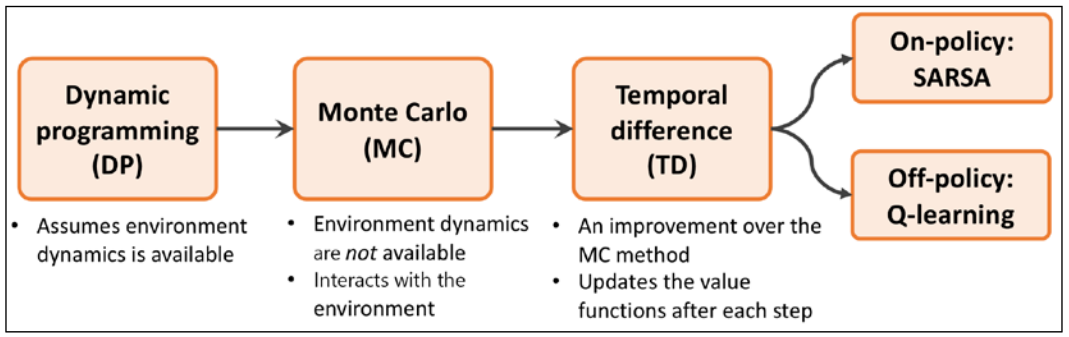

In [19]:
Image('imagens\q_learning.PNG')

Nas seções seguintes deste módulo, analisaremos cada um desses algoritmos de RL. Começaremos com programação dinâmica, antes de passar para o MC e, finalmente, para o TD e suas ramificações de **SARSA dentro da política (estado-ação-recompensa-estado-ação)** e Q-learning fora da política. Também passaremos para o Q-learning profundo enquanto construímos alguns modelos práticos.

### Programação dinâmica

Nesta seção, vamos nos concentrar em resolver problemas de RL sob as seguintes suposições:
• Temos pleno conhecimento sobre a dinâmica do ambiente; isso é tudo probabilidades de transição $\small p(s', r' \mid s,a)$ são conhecidas.

O estado do agente tem a propriedade de Markov, o que significa que a próxima ação e recompensa dependem apenas do estado atual e da escolha da ação que fazemos neste momento ou intervalo de tempo atual.

A formulação matemática para problemas de RL usando um processo de decisão de Markov (MDP) foi apresentada anteriormente neste módulo. Se você precisar de uma atualização, consulte a seção, que introduziu a definição formal da função de valor $\small v_\pi$ seguindo a política $\small \pi$, e a equação de Bellman, que foi derivada usando a dinâmica do ambiente.

Devemos enfatizar que a programação dinâmica não é uma abordagem prática para resolver problemas de RL. O problema com o uso de programação dinâmica é que ela pressupõe pleno conhecimento da dinâmica do ambiente, o que geralmente é irracional ou impraticável para a maioria das aplicações do mundo real. No entanto, do ponto de vista educacional, a programação dinâmica ajuda na introdução de RL de maneira simples e motiva o uso de algoritmos de RL mais avançados e complicados.

Existem dois objetivos principais através das tarefas descritas nas seguintes subseções:
1. Obtenha a verdadeira função estado-valor, $\small v_\pi(s)$; essa tarefa também é conhecida como tarefa de previsão e é realizada com a *avaliação de políticas*.
2. Encontre a função de valor ótimo, $\small v_*(s)$, que é realizada via *iteração de política generalizada*.

### Avaliação de políticas – prevendo a função de valor com programação dinâmica
Com base na equação de Bellman, podemos calcular a função valor para uma política arbitrária $\small \pi$ com programação dinâmica quando a dinâmica do ambiente é conhecida. Para calcular esta função de valor, podemos adaptar uma solução iterativa, onde começamos de $\small v^{\left \langle 0 \right \rangle}(s)$, que é inicializado com valores zero para cada estado. Então, a cada iteração *i + 1*, atualizamos os valores de cada estado com base na equação de Bellman, que por sua vez é baseada nos valores dos estados de uma iteração anterior *i*, como segue:
$$
\small v^{\left \langle i+1 \right \rangle}(s) = \sum_a \pi(a \mid s) \quad \sum_{s' \in \hat{S},r \in \hat{R}} p(s',r \mid s,a)\left [ r +\gamma v^{\left \langle i \right \rangle} \right(s') ]
$$

Pode ser mostrado que, à medida que as iterações aumentam para infinito, $\small v^{\left \langle i \right \rangle}(s)$ converge para a função estado-valor verdadeiro $\small v_\pi(s)$.

Além disso, observe aqui que não precisamos interagir com o ambiente. A razão para isso é que já conhecemos a dinâmica do ambiente com precisão. Como resultado, podemos aproveitar essas informações e estimar a função valor facilmente.

Depois de calcular a função de valor, uma questão óbvia é como essa função de valor pode ser útil para nós se nossa política ainda for uma política aleatória. A resposta é que podemos realmente usar esse $\small v_\pi(s)$ calculado para melhorar nossa política, como veremos a seguir.

### Melhorando a política usando a função de valor estimado
Agora que calculamos a função de valor $\small v_\pi(s)$ seguindo a política existente,$\small \pi$ , queremos usar $\small v_\pi(s)$ e melhorar a política existente, $\small \pi$. Isso significa que queremos encontrar uma nova política, $\small \pi'$, que para cada estado, *s*, seguindo $\small \pi'$ renderia um valor maior ou pelo menos igual do que usando a política atual, $\small \pi$. Em termos matemáticos, podemos expressar esse objetivo para a política melhorada, $\small \pi'$, como:
$$
\small v_{\pi'}(s) \geq v_\pi(s) \quad \forall S \in \hat{S}
$$

Primeiro, lembre-se de que uma política, $\small \pi$, determina a probabilidade de escolher cada ação, *a*, enquanto o agente está no estado *s*. Agora, para encontrar $\small \pi'$ que sempre tem um valor melhor ou igual para cada estado, primeiro calculamos a função de valor de ação, $q_\pi(s,a)$, para cada estado, *s*, e ação, *a*, com base no valor de estado calculado usando a função de valor $\small v_\pi(s)$. Nós iteramos por todos os estados, e para cada estado, *s*, comparamos o valor do próximo estado $\small s'$′, que ocorreria se a ação a fosse selecionada.

Depois de obtermos o maior valor de estado avaliando todos os pares estado-ação via $q_\pi(s,a)$, podemos comparar a ação correspondente com a ação selecionada pela política atual. Se a ação sugerida pela política atual (ou seja, $\small \text{arg max}(a \mid s)$ ) é diferente da ação sugerida pela função valor-ação (ou seja, $\small \text{arg max}(s \mid a)$), então podemos atualizar a política reatribuindo as probabilidades das ações para corresponder à ação que dá o maior valor de ação, $\small q_\pi(s,a)$. Isso é chamado de algoritmo de **melhoria de política**.

### Iteração de política
Usando o algoritmo de melhoria de política descrito na subseção anterior, pode-se mostrar que a melhoria de política produzirá estritamente uma política melhor, a menos que a política atual já seja ótima (o que significa $\small v_\pi(s) =  v_{\pi'}(s) = v_*(S)$ para cada $\small s \in \hat{S}$).

> Observe que essa técnica é chamada de **iteração de política generalizada (GPI)**, que é comum entre muitos métodos de RL. Usaremos o GPI em seções posteriores deste módulo para os métodos de aprendizado MC e TD.

### Iteração de valor
Vimos que, repetindo a avaliação de políticas (calcula $\small v_\pi(s)$ e $\small q_\pi(s,a)$) e melhoria da política (encontrando $\small r'$ tal que $\small v_\pi'(S) \geq  v_\pi(s) \forall S \in \hat{S}$, podemos alcançar a política ótima. No entanto, pode ser mais eficiente se combinarmos as duas tarefas de avaliação de políticas e melhoria de políticas em uma única etapa. A equação a seguir atualiza a função de valor para a iteração *i + 1* (denotado por $\small v{\left \langle i +1 \right \rangle }$) com base na ação que maximiza a soma ponderada do próximo valor de estado e sua recompensa imediata ($\small r + \gamma v^{\left \langle i \right \rangle} (s'))$:

$$
\small v^{\left \langle i+1 \right \rangle}(s) = \underset{a}{max} \sum_{s',r}p(s', r \mid s,a)[r + \gamma v^{\left \langle i \right \rangle}(s')]
$$


Nesse caso, o valor atualizado para $\small v^{\left \langle i+1 \right \rangle}(s)$ é maximizado escolhendo a melhor ação de todas as ações possíveis, enquanto na avaliação de política, o valor atualizado estava usando a soma ponderada sobre todas as ações.

> ##### Notação para estimativas tabulares das funções de valor de estado e valor de ação
> Na maioria da literatura e livros didáticos de RL, as minúsculas $\small v_\pi$ e $\small q_\pi$ são usadas para se referir às funções de valor de estado verdadeiro e valor de ação verdadeiro, respectivamente, como funções matemáticas.
>
> Enquanto isso, para implementações práticas, essas funções de valor são definidas como tabelas de consulta. As estimativas tabulares dessas funções de valor são indicadas por $\small V(S_t = s) \approx v_\pi(S)$ e $\small Q_\pi(S_t = s,A_t = a) \approx q_\pi(s,a)$. Também usaremos essa notação neste módulo.

### Aprendizagem por reforço com Monte Carlo
Como vimos na seção anterior sobre programação dinâmica, ela se baseia em uma suposição simplista de que a dinâmica do ambiente é totalmente conhecida. Afastando-se da abordagem de programação dinâmica, agora assumimos que não temos nenhum conhecimento sobre a dinâmica do ambiente.

Ou seja, nós não conhecemos as probabilidades de transição de estado do ambiente e, em vez disso, queremos que o agente aprenda *interagindo* com o ambiente. Utilizando métodos de MC, o processo de aprendizagem é baseado na chamada **experiência simulada**.

Para RL baseado em MC, definimos uma classe de agente que segue uma política probabilística, $\small \pi$, e com base nessa política, nosso agente executa uma ação em cada etapa. Isso resulta em um episódio simulado.

Anteriormente, definimos a função valor-estado, de modo que o valor de um estado indica o retorno esperado desse estado. Na programação dinâmica, essa computação dependia do conhecimento da dinâmica do ambiente, ou seja, $\small p(s',r \mid s, a)$.

No entanto, a partir de agora, desenvolveremos algoritmos que não requerem a dinâmica do ambiente. Métodos baseados em MC resolvem este problema gerando episódios simulados onde um agente interage com o ambiente. A partir desses episódios simulados, poderemos calcular o retorno médio para cada estado visitado naquele episódio simulado.

### Estimativa de função de valor de estado usando MC
Após gerar um conjunto de episódios, para cada estado, *s*, o conjunto de episódios que todos passam pelo estado *s* é considerado para o cálculo do valor do estado *s*. Vamos supor que uma tabela de consulta seja usada para obter o valor correspondente à função valor, $\small V(S_t = s)$. As atualizações do MC para estimar a função valor são baseadas no retorno total obtido naquele episódio a partir da primeira vez que o estado *s* é visitado. Esse algoritmo é chamado de previsão de valor de **Monte Carlo na primeira visita**.

### Estimativa de função de valor de ação usando MC
Quando a dinâmica do ambiente é conhecida, podemos facilmente inferir a função valor-ação de uma função valor-estado olhando um passo à frente para encontrar a ação que fornece o valor máximo, como foi mostrado na seção *Programação dinâmica*. No entanto, isso não é viável se a dinâmica do ambiente for desconhecida.

Para resolver esse problema, podemos estender o algoritmo para estimar a previsão de valor de estado do MC na primeira visita. Por exemplo, podemos calcular o retorno estimado para cada par estado-ação usando a função ação-valor. Para obter esse retorno estimado, consideramos as visitas a cada par estado-ação (*s, a*), que se refere a visitar o estado *s* e realizar a ação *a*.

No entanto, surge um problema, pois algumas ações podem nunca ser selecionadas, resultando em exploração (*exploration*) insuficiente. Existem algumas maneiras de resolver isso. A abordagem mais simples é chamada de *start exploratory* (início exploratório), que assume que todo par estado-ação tem uma probabilidade diferente de zero no início do episódio.

Outra abordagem para lidar com essa questão de falta de exploração é chamada de $\small \epsilon \text{-greedy policy}$ (política gananciosa), que será discutida na próxima seção sobre melhoria de políticas.

### Encontrar uma política ideal usando o controle MC
O **controle MC** refere-se ao procedimento de otimização para melhorar uma política. Semelhante à abordagem de iteração de política na seção anterior (*programação dinâmica*), podemos alternar repetidamente entre avaliação de política e melhoria de política até atingirmos a política ideal. Assim, a partir de uma política aleatória, $\small \pi_0$, o processo de alternância entre avaliação de política e melhoria de política pode ser ilustrado da seguinte forma:
$$
\pi_0 \overset{Eval.}{\rightarrow} q_{\pi0} \overset{Improve}{\rightarrow}\pi_1\overset{Eval.}{\rightarrow}q_{\pi_1}\overset{Improve}{\rightarrow}\pi_2 \quad \cdots \quad \overset{Eval.}{\rightarrow} q_* \overset{Improve}{\rightarrow}\pi_*
$$


Melhoria da política – computando a política gananciosa a partir da função valor-ação Dada uma função valor-ação, q(s, a), podemos gerar uma política gananciosa (determinística) da seguinte forma:
$$
\small \pi(s) \overset{def}{=} \underset{a}{\text{arg max}}\: q(s,a) 
$$


Para evitar o problema da falta de exploração e considerar os pares estado-ação não visitados conforme discutido anteriormente, podemos deixar que as ações não ótimas tenham uma pequena chance ($\small \epsilon$) de serem escolhidas. Isso é chamado de $\small \epsilon \:\text{greedy policy}$, segundo a qual, todas as ações não ótimas no estado $s$ têm um mínimo $\small \dfrac{\epsilon}{|A(s)|}$ probabilidade de ser selecionado (em vez de 0), e a ação ótima tem uma probabilidade de $\small 1 - \dfrac{(|A(s)| - 1) \times \epsilon}{|A(s)|}$ (em vez de 1).

### Aprendizagem da diferença temporal
Até agora, vimos duas técnicas fundamentais de RL, programação dinâmica e aprendizado baseado em MC. Lembre-se de que a programação dinâmica depende do conhecimento completo e preciso da dinâmica do ambiente. O método baseado em MC, por outro lado, aprende por experiência simulada. Nesta seção, apresentaremos agora um terceiro método de RL chamado aprendizado TD, que pode ser considerado como uma melhoria ou extensão da abordagem de RL baseada em MC.

Semelhante à técnica MC, o aprendizado TD também é baseado no aprendizado pela experiência e, portanto, não requer nenhum conhecimento da dinâmica do ambiente e probabilidades de transição. A principal diferença entre as técnicas TD e MC é que no MC, temos que esperar até o final do episódio para poder calcular o retorno total.

No entanto, no aprendizado TD, podemos aproveitar algumas das propriedades aprendidas para atualizar os valores estimados antes de chegar ao final do episódio. Isso é chamado de `bootstrapping` (no contexto de RL, o termo `bootstrapping` não deve ser confundido com as estimativas de `bootstrap`).

Semelhante à abordagem de programação dinâmica e aprendizado baseado em MC, consideraremos duas tarefas: estimar a função de valor (que também é chamada de previsão de valor) e melhorar a política (que também é chamada de tarefa de controle).

### Previsão de TD
Vamos primeiro revisitar a previsão de valor por MC. No final de cada episódio, podemos estimar o retorno $\small G_t$ para cada passo de tempo *t*. Portanto, podemos atualizar nossas estimativas para os estados visitados da seguinte forma:
$$
\small V(S_t) = V(S_t) + \alpha(G_t - V(S_t))
$$


Aqui, $\small G_t$ é usado como o **retorno alvo** para atualizar os valores estimados e ($\small G_t − V(S_t)$) é um termo de correção adicionado à nossa estimativa atual do valor $\small V(S_t)$ . O valor $\small \alpha$ é um hiperparâmetro que denota a taxa de aprendizado, que é mantida constante durante o aprendizado.

Observe que em MC, o termo de correção usa o retorno *real*, $\small G_t$, que não é conhecido até o final do episódio. Para esclarecer isso, podemos renomear o retorno real, $\small G_t$ , para $\small G_{t:T}$ , onde o subscrito *t: T* indica que este é o retorno obtido no passo de tempo *t* considerando todos os eventos ocorridos desde o passo de tempo *t* até o passo de tempo final, *T*.

No aprendizado TD, substituímos o retorno real, $\small G_{t:T}$, por um novo retorno alvo, $\small G_{t:t+1}$, o que simplifica significativamente as atualizações para a função de valor, $\small V(S_t)$. A fórmula de atualização baseada no aprendizado TD é a seguinte:
$$
\small V(S_t) = V(S_t) + \alpha[G_{t:t+1} - V(S_t)]
$$

Aqui, o retorno alvo, $\small G_{t: t+1} \overset{def}{=} R_{t+1} + \gamma V(S_{t+1}) = r + \gamma V(S_{t+1})$, está usando a recompensa observada, $\small R_{t+1} = r$, e o valor estimado do próximo passo imediato. Observe a diferença entre MC e TD. No MC, $\small G_{t:T}$ não está disponível até o final do episódio, então devemos executar quantos passos forem necessários para chegar lá. Pelo contrário, no TD, basta dar um passo à frente para obter o retorno desejado. Isso também é conhecido como TD(0).

Além disso, o algoritmo TD(0) pode ser generalizado para o chamado algoritmo TD de n etapas, que incorpora mais etapas futuras – mais precisamente, a soma ponderada de n etapas futuras. Se definirmos n = 1, então o procedimento TD de n etapas é idêntico ao TD(0), que foi descrito no parágrafo anterior. Se $\small n \rightarrow \infty$, no entanto, o algoritmo TD de n etapas será o mesmo que o algoritmo MC. A regra de atualização para TD de n etapas é a seguinte:

$$
\small V(S_t) = V(S_t) + \alpha[G_{t:t+n} - V(S_t)]
$$

e $\small G_{t:t+n}$ é definido como:
$$
\small 

G_{t:t+n} \overset{def}{=}
\begin{cases}
R_{t+1} + \gamma R_{t+2} + \cdots \gamma^{n-1}R_{t+n} + \gamma^nV(S_{t+n}) & \quad if \: t+n < T \\ 
G_{t:T} & \quad \text{otherwise}
\end{cases}
$$

> #####  MC versus TD: qual método converge mais rápido?
> Embora a resposta precisa para essa pergunta ainda seja desconhecida, na prática, é demonstrado empiricamente que TD pode convergir mais rápido que MC. Se você estiver interessado, poderá encontrar mais detalhes sobre as convergências de MC e TD no livro intitulado *Reinforcement Learning: An Introduction, de Richard S. Sutton e Andrew G. Barto*.

Agora que cobrimos a tarefa de previsão usando o algoritmo TD, podemos passar para a tarefa de controle. Abordaremos dois algoritmos para controle TD: um controle dentro da política e um controle fora da política. Em ambos os casos, usamos o GPI que foi usado tanto na programação dinâmica quanto nos algoritmos de MC. No controle TD dentro da política, a função valor é atualizada com base nas ações da mesma política que o agente está seguindo, enquanto em um algoritmo fora da política, a função valor é atualizada com base nas ações fora da política atual.

### Controle TD dentro da política (SARSA)
Para simplificar, consideramos apenas o algoritmo TD de uma etapa, ou TD(0). No entanto, o algoritmo de controle TD on-policy pode ser prontamente generalizado para TD de n etapas. Começaremos estendendo a fórmula de previsão para definir a função de valor de estado para descrever a função de valor de ação. Para fazer isso, usamos uma tabela de pesquisa, ou seja, uma matriz 2D-array, $\small Q(S_t,A_t)$, que representa a função ação-valor para cada par estado-ação. Neste caso, teremos o seguinte:
$$
\small Q(S_t,A_t) = Q(S_t,A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t)]
$$



Esse algoritmo é frequentemente chamado de SARSA, referindo-se ao quíntuplo $\small (S_t,A_t,R_{t+1},S_{t+1},A_{t+1})$ que é usado na fórmula de atualização.

Como vimos nas seções anteriores que descrevem a programação dinâmica e os algoritmos MC, podemos usar a estrutura GPI e, a partir da política aleatória, podemos estimar repetidamente a função de valor de ação para a política atual e otimizar a política usando o $\small \epsilon$-greedy policy na função de valor de ação atual.

### Controle TD fora da política (Q-learning)
Vimos ao usar o algoritmo de controle TD on-policy anterior que a forma como estimamos a função de valor de ação é baseada na política usada no episódio simulado. Depois de atualizar a função de valor de ação, uma etapa separada para melhoria de política é executada executando a ação que possui o valor mais alto. Uma abordagem alternativa (e melhor) é combinar essas duas etapas. Em outras palavras, imagine que o agente está seguindo a política $\small \pi$, gerando um episódio com a quíntupla de transição atual $\small(S_t,A_t,R_{t+1},S_{t+1},A_{t+1})$. Em vez de atualizar a função de valor de ação usando o valor de ação de $\small A_{t+1}$ que é executado pelo agente, podemos encontrar a melhor ação, mesmo que não seja realmente escolhida pelo agente seguindo a política atual. (É por isso que é considerado um algoritmo fora da política.) Para fazer isso, podemos modificar a regra de atualização para considerar o valor Q máximo variando diferentes ações no próximo estado imediato. A equação modificada para atualizar os valores Q é a seguinte:
$$
\small q(S_t,A_t) = Q(S_t,A_t) + \alpha\left [ R_{t+1} + \gamma \:\underset{a}{max} \: Q(S_{t+1,a}) - Q(S_t,A_t)\right  ]
$$


Recomendamos que você compare a regra de atualização aqui com a do algoritmo SARSA. Como você pode ver, encontramos a melhor ação no próximo estado,$ \small S_{t+1}$, e usamos isso no termo de correção para atualizar nossa estimativa de $\small Q(S_t,A_t)$.

Para colocar esses materiais em perspectiva, na próxima seção, veremos como implementar o algoritmo Q-learning para resolver o **problema do mundo da grade**.

### Implementando nosso primeiro algoritmo RL

Nesta seção, abordaremos a implementação do algoritmo Q-learning para resolver o *problema do mundo da grade*. Para fazer isso, usamos o kit de ferramentas *OpenAI Gym*.

### Apresentando o kit de ferramentas OpenAI Gym
*OpenAI Gym* é um kit de ferramentas especializado para facilitar o desenvolvimento de modelos RL. O *OpenAI Gym* vem com vários ambientes predefinidos. Alguns exemplos básicos são *CartPole* e *MountainCar*, onde as tarefas são equilibrar um poste e mover um carro morro acima, respectivamente, como os nomes sugerem. Existem também muitos ambientes robóticos avançados para treinar um robô para buscar, empurrar e alcançar itens em uma bancada ou treinar uma mão robótica para orientar blocos, bolas ou canetas. Além disso, o *OpenAI Gym* fornece uma estrutura unificada e conveniente para o desenvolvimento de novos ambientes. Mais informações podem ser encontradas em seu site oficial: https://gym.openai.com/.

Para seguir os exemplos de código do *OpenAI Gym* nas próximas seções, você precisa instalar a biblioteca `gym`, o que pode ser feito facilmente usando `pip`:
<code>
> pip install gym

</code>

Se precisar de ajuda adicional com a instalação, consulte o guia de instalação oficial em https://gym.openai.com/docs/#installation.

### Trabalhando com os ambientes existentes no OpenAI Gym
Para praticar com os ambientes Gym, vamos criar um ambiente do `CartPole-v1`, que já existe no OpenAI Gym. Neste ambiente de exemplo, há um poste preso a um carrinho que pode se mover horizontalmente, conforme mostra a figura a seguir:

<>:1: DeprecationWarning: invalid escape sequence \c


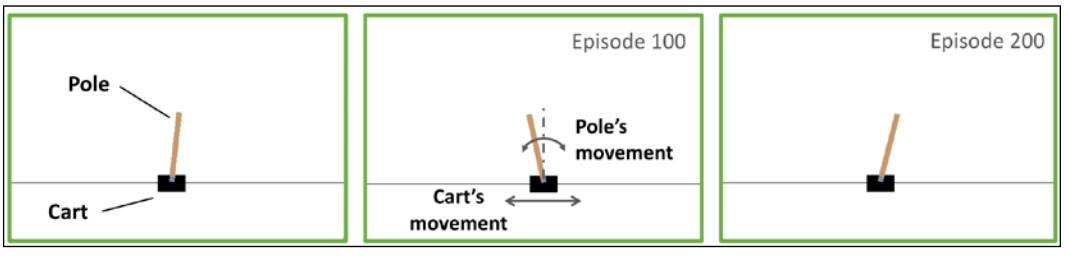

In [20]:
Image('imagens\cart_pole.PNG')

Os movimentos do poste são regidos pelas leis da física, e o objetivo dos agentes RL é aprender a mover o carrinho para estabilizar o poste e evitar que ele tombe para os lados.

Agora, vamos ver algumas propriedades do ambiente *CartPole* no contexto de RL, como seu espaço de estado (ou observação), espaço de ação e como executar uma ação:

In [21]:
import gym
env = gym.make('CartPole-v1')
env.observation_space


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [22]:
env.action_space

Discrete(2)

No código anterior, criamos um ambiente para o problema `CartPole`. O espaço de observação para este ambiente é o Box(4), que representa um espaço quadridimensional correspondente a quatro números reais: a posição do carrinho, a velocidade do carrinho, o ângulo do poste e a velocidade da ponta do pólo. O espaço de ação é um espaço discreto, `Discrete(2)`, com duas opções: empurrar o carrinho para a esquerda ou para a direita.

O objeto de ambiente, env, que criamos anteriormente chamando `gym.make('CartPole-v1')` tem um método `reset()` que podemos usar para reinicializar um ambiente antes de cada episódio. Chamar o método `reset()` basicamente definirá o estado inicial do pólo ($S_0$):

In [23]:
env.reset()

array([ 0.01883988,  0.04621958, -0.00615165,  0.04807684], dtype=float32)

Os valores no array retornados pela chamada do método `env.reset()` significam que a posição inicial do carrinho é –0,017 com velocidade –0,030, e o ângulo do poste é de 0,0004 radianos enquanto a velocidade angular da sua ponta é –0,019. Ao chamar o método `reset()`, esses valores são inicializados com valores aleatórios com distribuição uniforme no intervalo[–0,05, 0,05].

Depois de redefinir o ambiente, podemos interagir com o ambiente escolhendo uma ação e executando-a passando a ação para o método `step()`:

In [24]:
env.step(action=0)

(array([ 0.01976427, -0.14881362, -0.00519011,  0.33881253], dtype=float32),
 1.0,
 False,
 {})

In [25]:
env.step(action=1)

(array([0.016788  , 0.0463818 , 0.00158614, 0.04449746], dtype=float32),
 1.0,
 False,
 {})

Através dos dois comandos anteriores, `env.step(action=0)` e `env.step(action=1)`, empurramos o carrinho para a esquerda (`action=0`) e depois para a direita (`action=1`), respectivamente. Com base na ação selecionada, o carrinho e seu poste podem se mover conforme as leis da física. Toda vez que chamamos `env.step()`, ele retorna uma tupla composta por quatro elementos:
* Uma matriz para o novo estado (ou observações)
* Uma recompensa (um valor escalar do tipo `float`)
* Um sinalizador de rescisão (`True` ou `False`)
* Um dicionário Python contendo informações auxiliares

O objeto `env` também possui um método `render()`, que podemos executar após cada etapa (ou uma série de etapas) para visualizar o ambiente e os movimentos do poste e do carrinho, ao longo do tempo.

O episódio termina quando o ângulo do poste se torna maior que 12 graus (de ambos os lados) em relação a um eixo vertical imaginário, ou quando a posição do carrinho está a mais de 2,4 unidades da posição central. A recompensa definida neste exemplo é maximizar o tempo que o carrinho e o poste ficam estabilizados dentro das regiões válidas – em outras palavras, a recompensa total (ou seja, o retorno) pode ser aumentada pela maximização da duração do episódio.

### Um exemplo do mundo da grade
Depois de apresentar o ambiente CartPole como um exercício de aquecimento para trabalhar com o kit de ferramentas OpenAI Gym, agora mudaremos para um ambiente diferente. Trabalharemos com um exemplo do mundo grid, que é um ambiente simplista com `m` linhas e `n` colunas. Considerando` m = 4` e `n = 6`, podemos resumir esse ambiente conforme mostrado na figura a seguir:

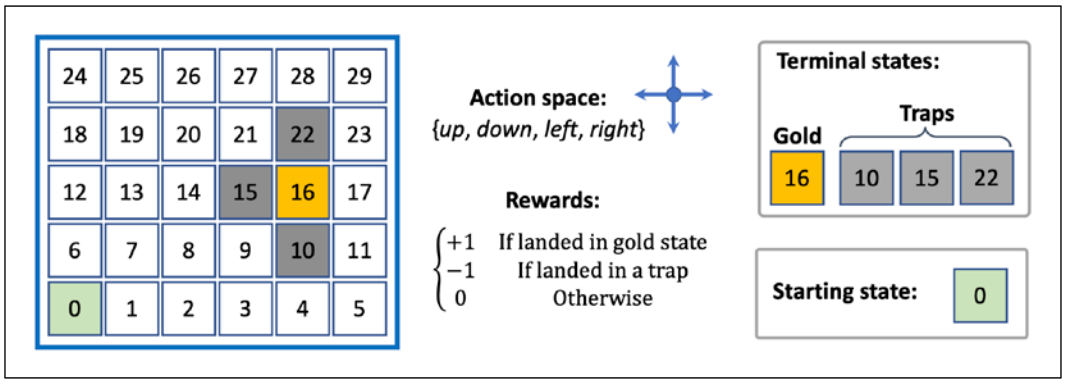

In [26]:
Image('imagens/grid_world.PNG')

Neste ambiente, existem 30 estados possíveis diferentes. Quatro desses estados são estados terminais: um pote de ouro no estado 16 e três armadilhas nos estados 10, 15 e 22. Aterrissar em qualquer um desses quatro estados terminais encerrará o episódio, mas com uma diferença entre os estados de ouro e armadilha. Aterrissar no estado de ouro produz uma recompensa positiva, +1, enquanto mover o agente para um dos estados de armadilha produz uma recompensa negativa, -1. Todos os outros estados têm uma recompensa de 0. O agente sempre começa no estado 0. Portanto, toda vez que redefinimos o ambiente, o agente volta ao estado 0. O espaço de ação consiste em quatro direções: mover para cima, para baixo, para a esquerda, e direita. Quando o agente está no limite externo da grade, selecionar uma ação que resultaria na saída da grade não alterará o estado.

A seguir, veremos como implementar esse ambiente em Python, usando o pacote *OpenAI Gym*.

### Implementando o ambiente do mundo da grade no OpenAI Gym
Para experimentar o ambiente do mundo da grade por meio do OpenAI Gym, é altamente recomendável usar um editor de script ou IDE em vez de executar o código interativamente. Primeiro, criamos um novo script Python chamado `gridworld_env.py` e então, procedemos importando os pacotes necessários e duas funções auxiliares que definimos para construir a visualização do ambiente.

Para renderizar os ambientes para fins de visualização, a biblioteca OpenAI Gym usa a biblioteca `Pyglet` e fornece classes e funções wrapper para nossa conveniência. Usaremos essas classes wrapper para visualizar o ambiente do mundo da grade no exemplo de código a seguir. Mais detalhes sobre essas classes wrapper podem ser encontrados em https://github.com/openai/gym/blob/master/gym/envs/classic_control/rendering.py.

O exemplo de código a seguir usa essas classes wrapper: